In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()
#digits
#digits.images.shape

1
1
YES


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
print (digits.target[9])

9


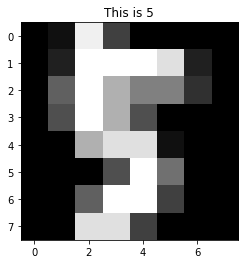

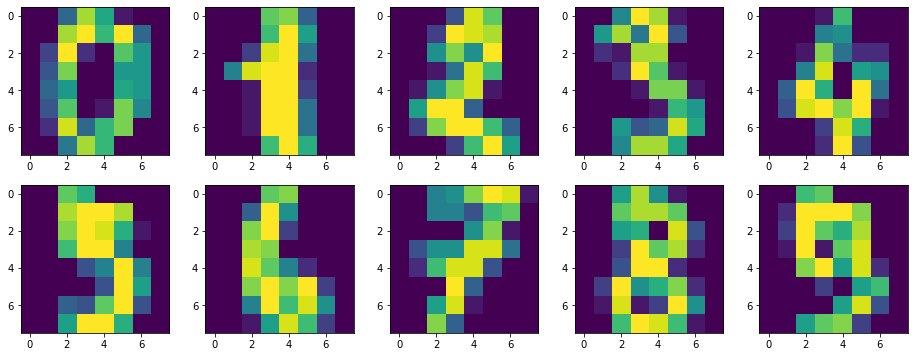

In [3]:
i = 46
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

X = digits.data
y = digits.target
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));
    

In [4]:
#Problem1
#Разделить рукописные цифры по кластерам и вывести их центроиды
from scipy.cluster.vq import kmeans

vector_images = digits.images.reshape((digits.images.shape[0], -1))

def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def digits_pr(k):
    centroids, eps = kmeans(vector_images, k)
    labels = get_labels(vector_images, centroids) 
   
    digit_clasters = []
    for i in range(k):
        digit_clasters.append(np.argmax(np.bincount(digits.target[labels == i])))
    
    predict_digits = np.array(list(map(digit_clasters.__getitem__, labels)))#обращение к элементам массива
    return predict_digits, centroids, digit_clasters

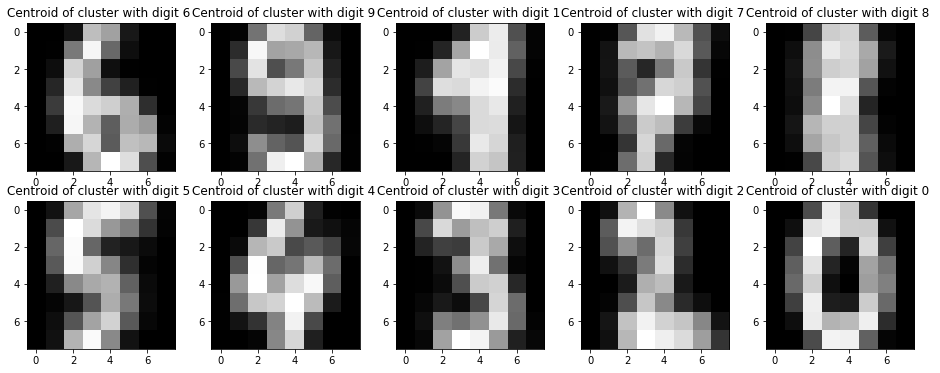

In [5]:
predict_digits, centroids, digit_clasters = digits_pr(10)

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title('Centroid of cluster with digit {} '.format(digit_clasters[i]))
    plt.imshow(centroids[i].reshape((8,8)),cmap='gray')


In [6]:
#Problem2
#Найти вероятность того, что была допущена ошибка при разделении по кластерам
def error(true_digits,predict_digits):
    return np.count_nonzero(true_digits != predict_digits) / true_digits.size

print('Error for all data', error(digits.target, predict_digits))
#k=10
#vector_images = digits.images.reshape((digits.images.shape[0], -1))
#centroids, eps = kmeans(vector_images, k)
#labels = get_labels(vector_images, centroids) 
#predict_digits = np.array(list(map(digit_clasters.__getitem__, labels)))
#true_digits = digits.target



for i in range(10):
    digit_i_mask = (digits.target == i)
    print('Digit', i, 'probability of error', error(digits.target[digit_i_mask], predict_digits[digit_i_mask]))
    




Error for all data 0.20812465219810797
Digit 0 probability of error 0.0056179775280898875
Digit 1 probability of error 0.6978021978021978
Digit 2 probability of error 0.1638418079096045
Digit 3 probability of error 0.14207650273224043
Digit 4 probability of error 0.09392265193370165
Digit 5 probability of error 0.25274725274725274
Digit 6 probability of error 0.022099447513812154
Digit 7 probability of error 0.05027932960893855
Digit 8 probability of error 0.42528735632183906
Digit 9 probability of error 0.22777777777777777


In [7]:
#Problem3
#Построить таблицу, элементы которой (aij)- это количество путаницы между цифрами i и j, где i - правильная, а j - предсказанная
k = 10
def make_matrix(true_digits, predict_digits):
    matrix = np.array([[np.count_nonzero((true_digits == i) & (predict_digits == j)) for j in range(k)] \
                            for i in range(k)])
    plt.matshow(matrix)
    plt.xticks(range(k))
    plt.yticks(range(k))
    plt.title(' Mistakes matrix ')
    plt.ylabel('Правильное значение')
    plt.xlabel('Предсказанное значение')
    plt.show()

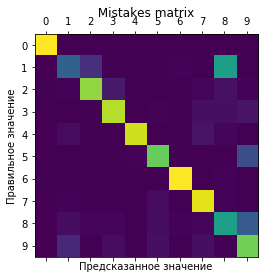

In [8]:
make_matrix(digits.target,predict_digits)
#По таблице можно сдлеать вывод, что модель плохо классифицирует 1, 8 и 9 и с большей точностью классифицирует 0, 4, 6, 7

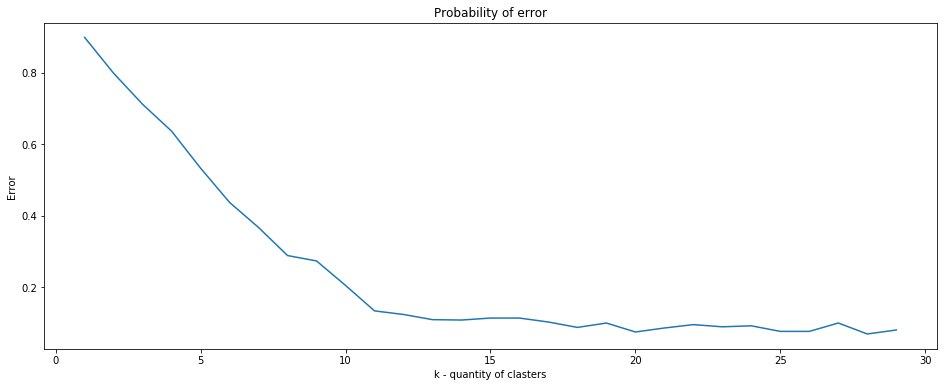

In [9]:
#Problem4 
#Построить график зависимости вероятности ошибки от количества кластеров
r = range(1, 30)
errors = [error(digits.target, digits_pr(k)[0]) for k in r]#ищем ошибку между тем, какое число 
#на самом деле и тем, что выдает функция предсказания для каждого k
plt.figure(figsize=(16,6))
plt.title('ERROR graph')
plt.xlabel('k - quantity of clasters')
plt.ylabel('Probability of error')
plt.plot(r, errors)
#Комментарий к графику
#Т.к. вероятноcть ошибки , начиная с k = 15 примерно одинаковая и находится в коридоре [0,0.2], 
# то можно взять k = 15 за оптимально. Сильно большое k брать не стоит т.к. цифр всего 10, и основная задача - это различить их 

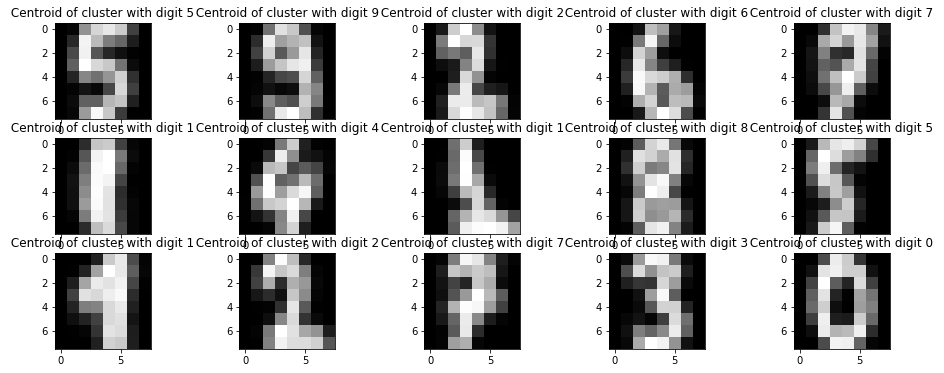

In [12]:
#Problem5
#Показать центроиды и преобладающие цифры для оптимального k.
#Каким цифрам соответсвует больше одного кластера, а каким ровно один?

predict_digits, centroids, digit_clasters = digits_pr(15)
plt.figure(figsize=(16,6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.title(' Centroid of cluster with digit {} '.format(digit_clasters[i]))
    plt.imshow(centroids[i].reshape((8,8)),cmap='gray')


#Вывод
#Таким образом цифрам 5, 2, 7 соответствует 2 кластера, а цифрам 9, 6, 4, 8, 3, 0 один кластер, а 1-це соответствует 3 кластера 

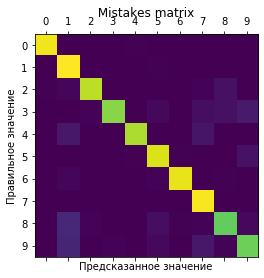

In [15]:
make_matrix(digits.target,predict_digits)

#По таблице можно сделать вывод, что при выборе оптимального k, точность работы модели увеличилась. Например для цифр 1, 8 и 9,
#она стала выше, чем при k = 10